In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

### Dataset
- The dataset is about Gym workout routines.
- The features this data has is: -

   * Features (Age, Gender, Weight, Height, Max_BPM, Avg_BPM, Resting_BPM, Session_Duration, Calories_Burned,Fat_Percentage, Water_Intake, Workout_Frequency, Experience_Level,BMI)

   * Target: workout types (Yoga, HIIT, Strength, Cardio)

In [26]:
workout_data = pd.read_csv('gym_members_exercise_tracking.csv')
workout_data

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency,Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [29]:
data=workout_data
X=data[['Age','Experience_Level']]
y=data['Water_Intake (liters)']

In [30]:
X

,Age,Experience_Level
0,56,3
1,46,2
2,32,2
3,25,1
4,38,1
...,...,...
968,24,3
969,25,1
970,59,3
971,32,2


In [31]:
y = [int(label) for label in y]

In [32]:
y

[3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 3,
 2,
 3,
 1,
 1,
 2,
 2,
 3,
 1,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 1,
 3,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 2,
 3,
 3,
 2,
 2,
 1,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 1,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 1,
 3,
 1,
 3,
 2,
 3,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 3,


## Algoritms Implementation

In [ ]:
# Using Radial Basis Function (RBF) Kernel
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
svm_report = classification_report(y_test, y_pred_svm)
report = svm_report.split("\n")
for i in report:
    print(i)

print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_svm))



Accuracy: 0.5494223363286265
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       113
           2       0.55      1.00      0.71       428
           3       0.00      0.00      0.00       238

    accuracy                           0.55       779
   macro avg       0.18      0.33      0.24       779
weighted avg       0.30      0.55      0.39       779

Confusion Matrix:
 [[  0 113   0]
 [  0 428   0]
 [  0 238   0]]


c:\Users\EDVIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\EDVIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\EDVIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5494223363286265
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       113
           2       0.55      1.00      0.71       428
           3       0.00      0.00      0.00       238

    accuracy                           0.55       779
   macro avg       0.18      0.33      0.24       779
weighted avg       0.30      0.55      0.39       779

Confusion Matrix:
 [[  0 113   0]
 [  0 428   0]
 [  0 238   0]]


c:\Users\EDVIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\EDVIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\EDVIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
# Experimenting with different values of  C
from sklearn.metrics import accuracy_score

C = [1,5,10]

results = {}

for C in C:

    svm_model = SVC(kernel='linear', degree=3, C=C)

    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[C] = acc

results

{1: 0.5494223363286265, 5: 0.5494223363286265, 10: 0.5494223363286265}

In [ ]:
from sklearn.metrics import accuracy_score

C = [1,5,10]

results = {}

for C in C:
    svm_model = SVC(kernel='poly', degree=3, C=C)

    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[C] = acc

results

{1: 0.5494223363286265, 5: 0.5494223363286265, 10: 0.5494223363286265}

### Conculusion: Changing C seems to have no effect. Test size also does not change the accuracy too much

### Use Cases
1. Recommendation system to create a proper workout plan, required water consumption for a certain workout based on experince and age
2. Gym might plan their spendings on water based on their customers workout habit, as well as their experince level and age

In [ ]:
X=data[['Age','Experience_Level']]
X = X.values
y=data['Water_Intake (liters)']
y=y.apply(np.int64)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_clf = SVC(kernel='linear', C=5)
svm_clf.fit(X_train, y_train)


SVC(C=5, kernel='linear')

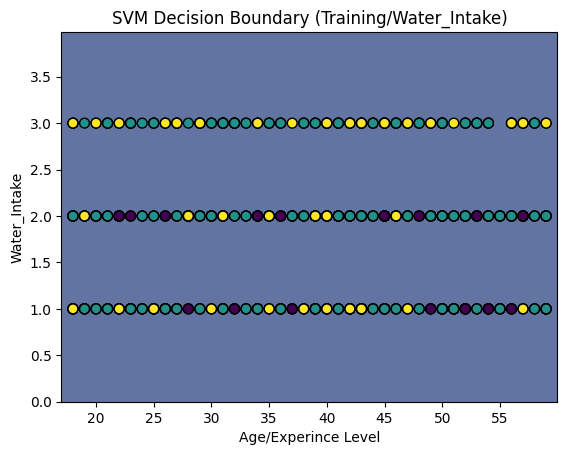

In [ ]:
def plot_decision_boundary(clf, X, y):
    h = .02  
    x_min = X[:, 0].min() - 1  
    x_max   =X[:, 0].max() + 1
    y_min  = X[:, 1].min() - 1
    y_max=  X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.xlabel('Age/Experince Level')
    plt.ylabel('Water_Intake')
    plt.title("SVM Decision Boundary (Training/Water_Intake)")
    plt.show()

plot_decision_boundary(svm_clf, X_train, y_train)


In [39]:
X[:,0][y==2]

array([46, 32, 25, 38, 56, 36, 28, 28, 57, 39, 19, 47, 55, 50, 44, 59, 20,
       54, 24, 26, 56, 35, 42, 31, 26, 43, 19, 37, 45, 52, 31, 34, 21, 23,
       59, 21, 46, 35, 43, 51, 31, 25, 31, 57, 38, 35, 43, 46, 32, 18, 42,
       41, 18, 25, 41, 34, 52, 50, 22, 59, 56, 24, 25, 29, 50, 40, 41, 57,
       44, 52, 54, 22, 43, 49, 47, 56, 46, 30, 24, 19, 45, 45, 47, 28, 45,
       56, 50, 18, 44, 30, 58, 20, 44, 50, 41, 49, 41, 58, 29, 56, 19, 20,
       34, 40, 54, 50, 36, 19, 43, 49, 34, 55, 41, 51, 39, 33, 50, 33, 46,
       20, 37, 43, 20, 50, 56, 18, 28, 40, 47, 52, 43, 19, 18, 29, 54, 49,
       58, 36, 33, 20, 28, 25, 57, 37, 42, 42, 46, 35, 19, 58, 53, 50, 21,
       50, 31, 24, 20, 34, 39, 39, 55, 55, 25, 44, 44, 50, 22, 36, 21, 52,
       34, 45, 23, 52, 58, 41, 46, 48, 38, 50, 20, 35, 42, 59, 48, 20, 57,
       41, 39, 40, 44, 26, 56, 43, 52, 41, 30, 24, 53, 18, 25, 31, 29, 32,
       51, 19, 49, 40, 42, 39, 59, 23, 54, 50, 22, 56, 52, 59, 47, 54, 40,
       26, 18, 18, 51, 57

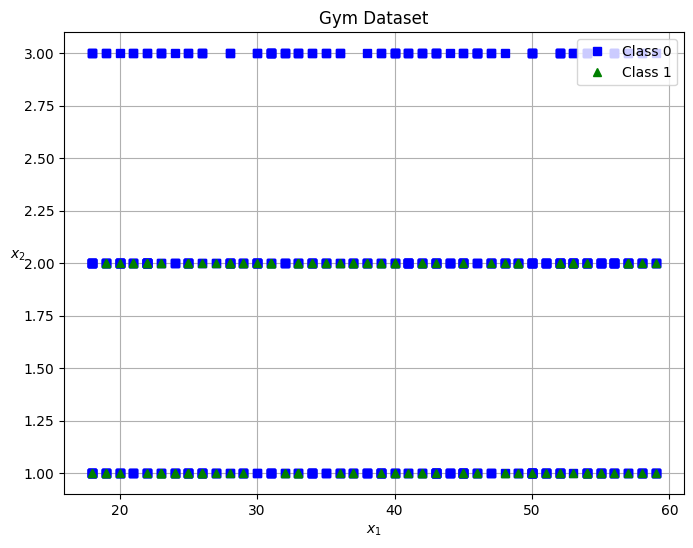

In [40]:
# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "bs", label="Class 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Class 1")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation=0)
plt.title('Gym Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
y

0      3
1      2
2      2
3      2
4      2
      ..
968    3
969    3
970    2
971    2
972    3
Name: Water_Intake (liters), Length: 973, dtype: int64

In [42]:

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

c:\Users\EDVIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

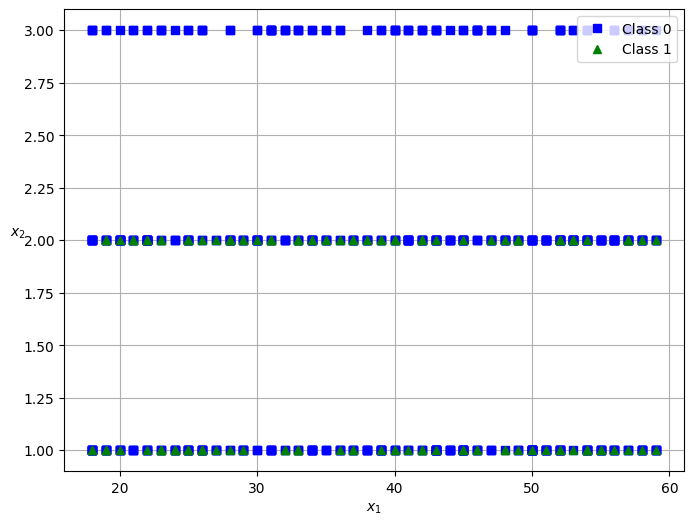

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "bs", label="Class 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Class 1")
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.legend()
plt.show()


In [44]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "bs", label="Class 0")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Class 1")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.legend()

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 300)
    x1s = np.linspace(axes[2], axes[3], 300)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_grid).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)


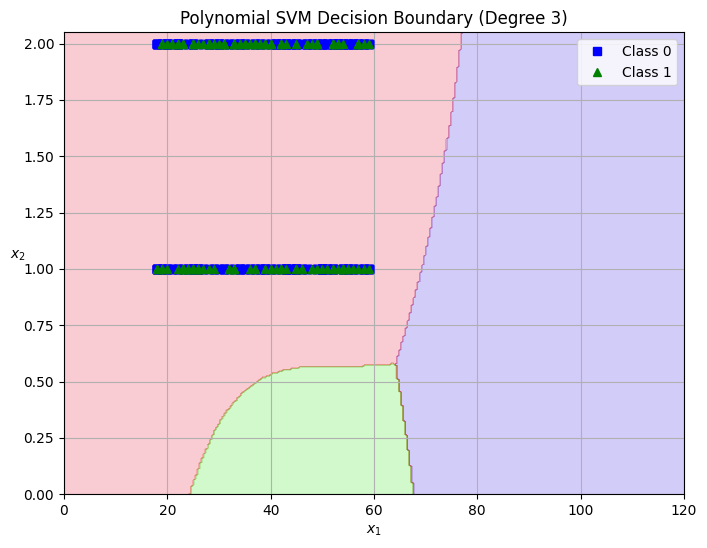

In [45]:

plt.figure(figsize=(8, 6))
plot_predictions(polynomial_svm_clf, [0, 120 ,0, 2.05 ])
plot_dataset(X, y, [0, 120 ,0, 2.05])
plt.title("Polynomial SVM Decision Boundary (Degree 3)")
plt.show()


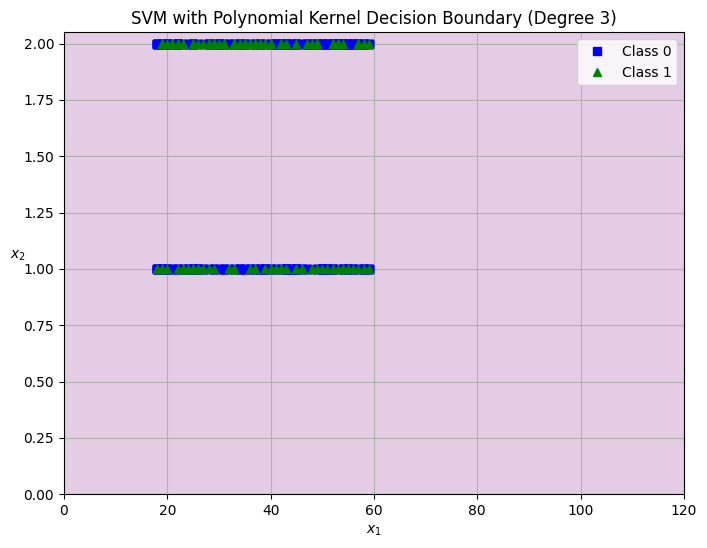

In [ ]:

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=10)
)
poly_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(8, 6))
plot_predictions(poly_kernel_svm_clf, [0, 120 ,0, 2.05 ])
plot_dataset(X, y, [0, 120 ,0, 2.05 ])
plt.title("SVM with Polynomial Kernel Decision Boundary (Degree 3)")
plt.show()

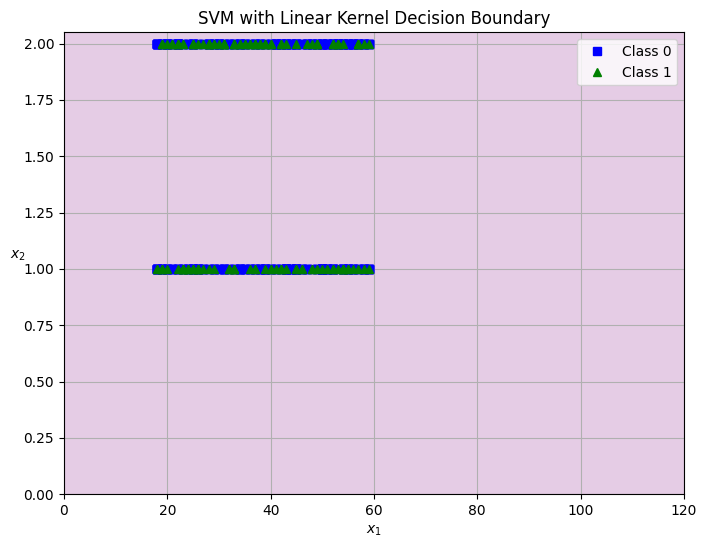

In [ ]:

svm_linear_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=1)
)
svm_linear_clf.fit(X, y)

plt.figure(figsize=(8, 6))
plot_predictions(svm_linear_clf, [0, 120 ,0, 2.05 ])
plot_dataset(X, y, [0, 120 ,0, 2.05 ])
plt.title("SVM with Linear Kernel Decision Boundary")
plt.show()
